# 8. Train models on VIENNA cohort, validate on external cohorts

- train the 5 models on VIENNA data, run predictions for the other cohorts
- report prediction performance for each model/cohort separately
- as usual, compare different parameter sets:
    - 5-P
    - 3-P
    - 5-P + LSM
    - 3-P + LSM
- for each parameter set also show distribution of HVPG labels

<sub>original notebook name: `VICIS_31_revision_v3_train_one_cohort_validate_other.ipynb`</sub>

In [1]:
import pandas as pd
import numpy as np

# prediction models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

In [2]:
import HVPG16_functions

In [3]:
preprocessed_data_path = "/Users/jreinis/OneDrive/Rotation/rotation/data_merged_final_v0/merged_datasets_preprocessed_final_v0.csv"

In [4]:
data = pd.read_csv(preprocessed_data_path)
# call liver stiffness just LSM
data.rename(columns = {"VCTE-LSM-kPa":"LSM"}, inplace=True)

In [5]:
models = [LogisticRegression(C = 1, max_iter=15000, warm_start=False),
          MLPClassifier(hidden_layer_sizes=(20,20,20,), max_iter=2000, warm_start=False, alpha=.001),
          RandomForestClassifier(n_estimators = 100, warm_start=False),
          SVC(kernel='rbf', C = 0.8, probability=True),
          XGBClassifier(n_estimators = 100, verbosity = 0)]
names = ["Logistic Reg", "MLP", "Random Forest", "SVM", "XGBoost"]

In [ ]:
# there is one patient with CHE in Madrid cohort: one cannot calculate ROC based on a single record -> discard this patient for this purpose
display(data[(data.CHE.notnull()) & (data.dataset == "MADRID")])

data_5P = data[~((data.CHE.notnull()) & (data.dataset == "MADRID"))].copy().reset_index(drop=True)

## HVPG16

#### 5-parameter model

5 variables (PLT, BILI, aPTT, CHE, GGT), trained on: VIENNA, 257 patients, 170 HVPG<16, 87 HVPG>=16


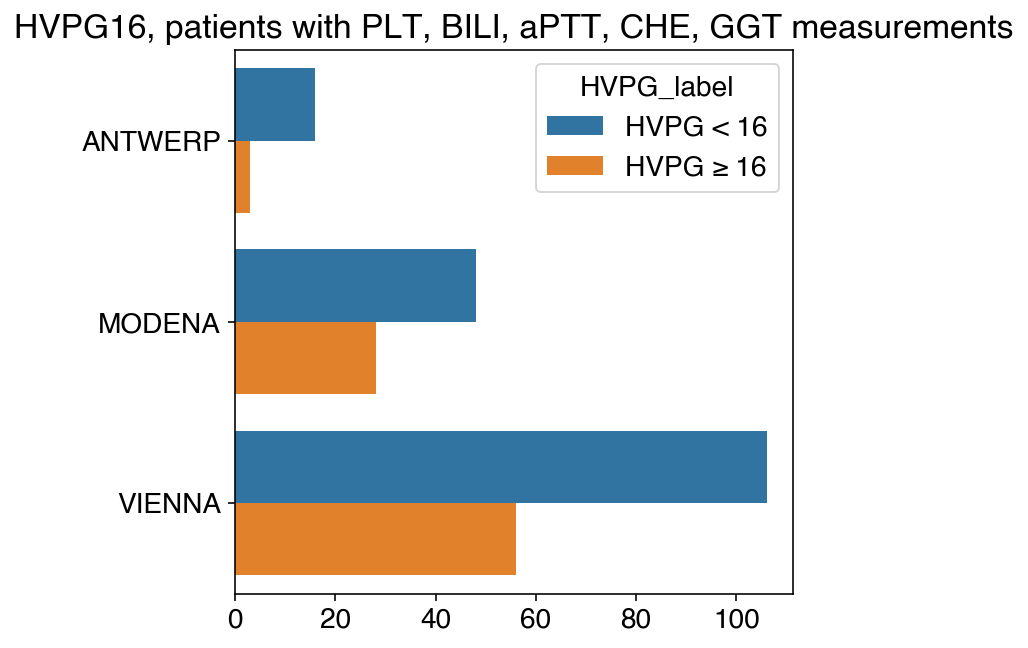

,VIENNA,ANTWERP,MODENA
Logistic Reg,0.902460,0.520833,0.689732
MLP,0.812500,0.500000,0.692708
Random Forest,1.000000,0.437500,0.693824
SVM,0.812247,0.500000,0.672619
XGBoost,1.000000,0.437500,0.644345


In [7]:
variables = ["PLT", "BILI", "aPTT", "CHE", "GGT"]
HVPG16_functions.train_one_cohort_validate_rest(data_5P, models, names, variables, "VIENNA")

#### 3-parameter model

3 variables (PLT, BILI, INR), trained on: VIENNA, 1204 patients, 788 HVPG<16, 416 HVPG>=16


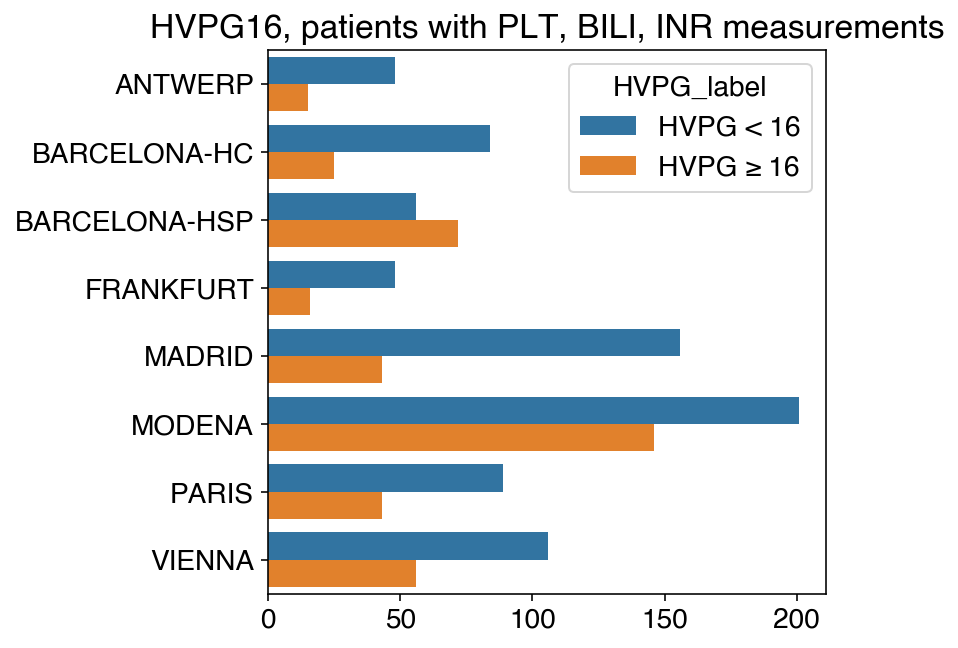

,VIENNA,ANTWERP,BARCELONA-HC,BARCELONA-HSP,FRANKFURT,MADRID,MODENA,PARIS
Logistic Reg,0.823787,0.534722,0.682857,0.599206,0.636719,0.880590,0.685971,0.720408
MLP,0.790431,0.640278,0.676667,0.576389,0.583333,0.867024,0.667570,0.688790
Random Forest,1.000000,0.596528,0.592619,0.592014,0.680990,0.835197,0.670023,0.763000
SVM,0.783019,0.701389,0.674286,0.542659,0.548177,0.853459,0.653002,0.658479
XGBoost,0.999832,0.609722,0.560952,0.554067,0.631510,0.808289,0.663293,0.741050


In [8]:
variables = ["PLT", "BILI", "INR"]
HVPG16_functions.train_one_cohort_validate_rest(data, models, names, variables, "VIENNA")

#### 5-parameter including liver stiffness

6 variables (PLT, BILI, aPTT, GGT, CHE, LSM), trained on: VIENNA, 207 patients, 137 HVPG<16, 70 HVPG>=16


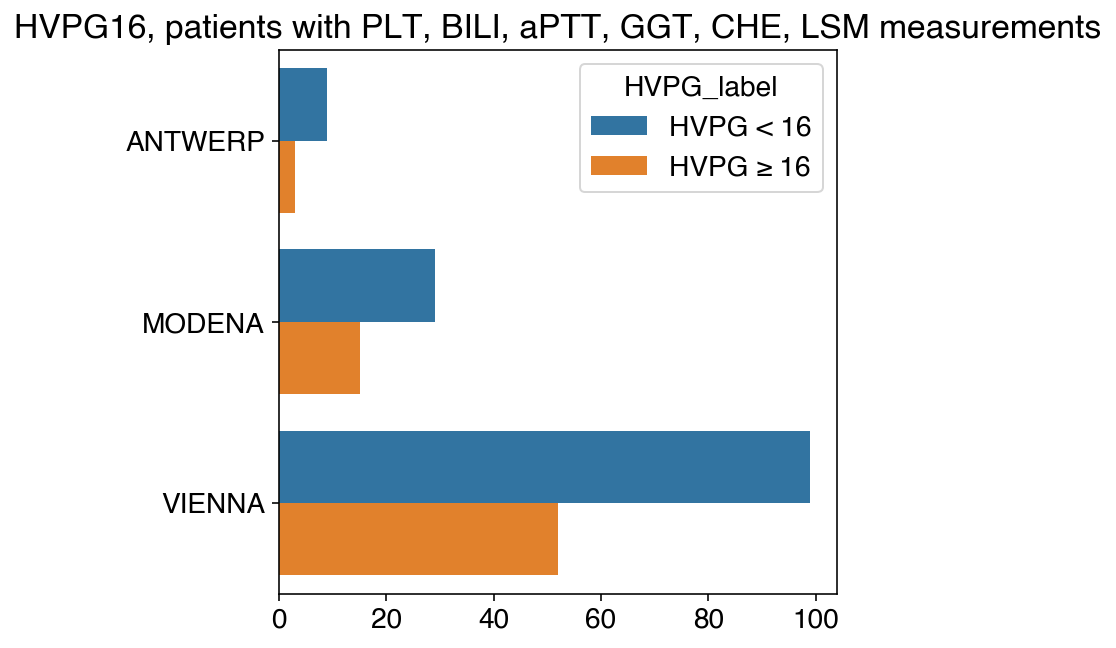

,VIENNA,ANTWERP,MODENA
Logistic Reg,0.931818,0.481481,0.882759
MLP,1.000000,0.444444,0.852874
Random Forest,1.000000,0.333333,0.881609
SVM,0.875291,0.370370,0.827586
XGBoost,1.000000,0.518519,0.864368


In [9]:
variables = ["PLT", "BILI", "aPTT", "GGT", "CHE", "LSM"]
HVPG16_functions.train_one_cohort_validate_rest(data_5P, models, names, variables, "VIENNA")

#### 3-parameter including liver stiffness

4 variables (PLT, BILI, INR, LSM), trained on: VIENNA, 796 patients, 541 HVPG<16, 255 HVPG>=16


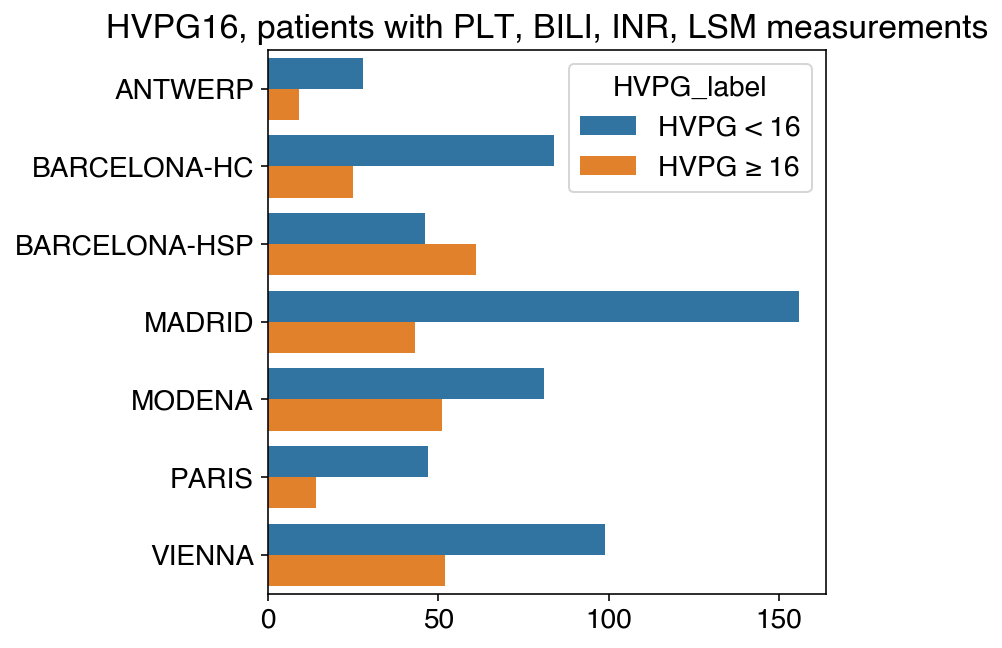

,VIENNA,ANTWERP,BARCELONA-HC,BARCELONA-HSP,MADRID,MODENA,PARIS
Logistic Reg,0.887141,0.626984,0.734762,0.738774,0.916369,0.806584,0.810030
MLP,0.879565,0.706349,0.747143,0.739130,0.919052,0.774389,0.826748
Random Forest,1.000000,0.646825,0.688333,0.714540,0.886032,0.778988,0.867021
SVM,0.880439,0.761905,0.740000,0.721668,0.904741,0.761196,0.844985
XGBoost,1.000000,0.650794,0.620952,0.682110,0.837955,0.765190,0.875380


In [10]:
variables = ["PLT", "BILI", "INR", "LSM"]
HVPG16_functions.train_one_cohort_validate_rest(data, models, names, variables, "VIENNA")

## HVPG10

#### 5-parameter model

5 variables (PLT, BILI, aPTT, CHE, GGT), trained on: VIENNA, 257 patients, 183 HVPG<10, 74 HVPG>=10


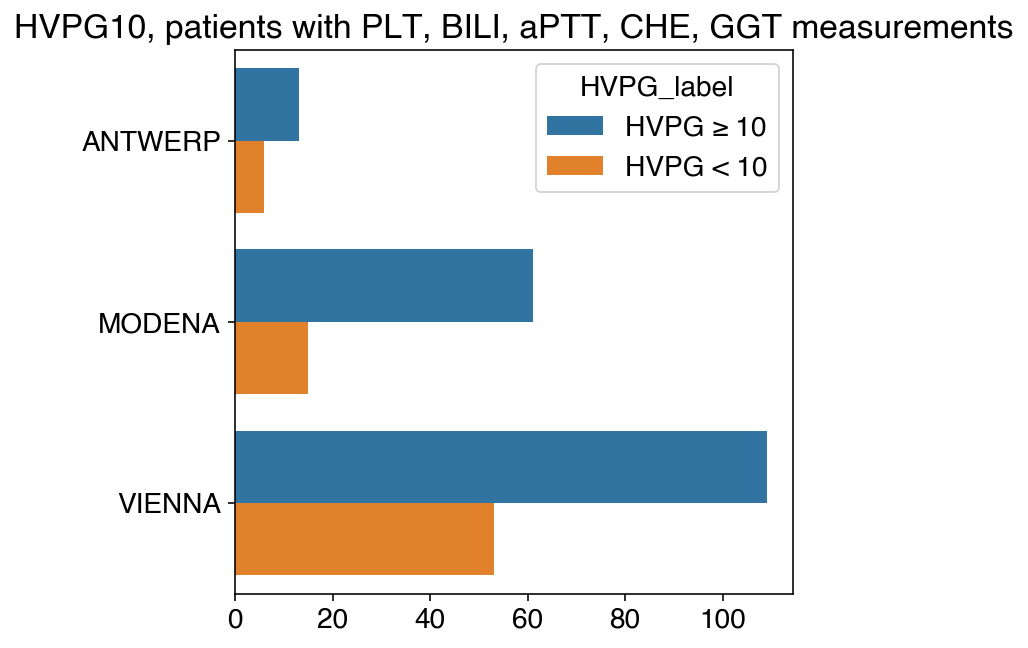

,VIENNA,ANTWERP,MODENA
Logistic Reg,0.842652,0.269231,0.690710
MLP,0.997230,0.320513,0.646995
Random Forest,1.000000,0.256410,0.679235
SVM,0.794530,0.474359,0.675410
XGBoost,1.000000,0.217949,0.598907


In [11]:
variables = ["PLT", "BILI", "aPTT", "CHE", "GGT"]
HVPG16_functions.train_one_cohort_validate_rest(data_5P, models, names, variables, "VIENNA", HVPG_thres=10)

#### 3-parameter model

3 variables (PLT, BILI, INR), trained on: VIENNA, 1204 patients, 844 HVPG<10, 360 HVPG>=10


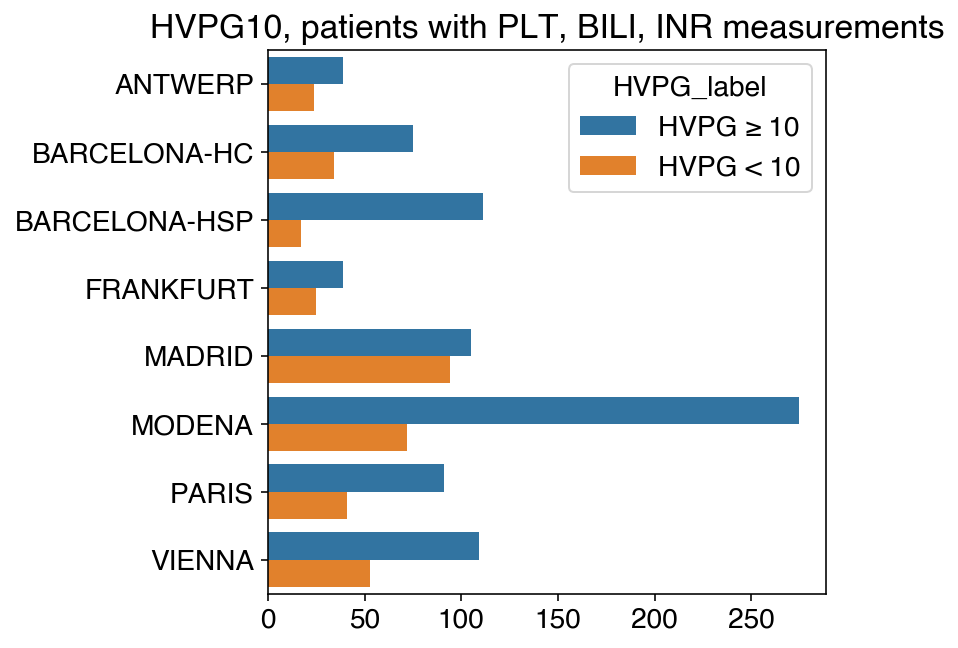

,VIENNA,ANTWERP,BARCELONA-HC,BARCELONA-HSP,FRANKFURT,MADRID,MODENA,PARIS
Logistic Reg,0.794011,0.441239,0.742745,0.838368,0.618462,0.858865,0.696061,0.807290
MLP,0.307426,0.375000,0.338431,0.204028,0.457436,0.203546,0.393788,0.340391
Random Forest,1.000000,0.521368,0.729412,0.799682,0.618462,0.841692,0.667854,0.778612
SVM,0.739571,0.559829,0.698039,0.784844,0.553846,0.844580,0.652677,0.740284
XGBoost,1.000000,0.476496,0.743922,0.742978,0.574872,0.808105,0.680631,0.792415


In [12]:
variables = ["PLT", "BILI", "INR"]
HVPG16_functions.train_one_cohort_validate_rest(data, models, names, variables, "VIENNA", HVPG_thres=10)

#### 5-parameter including liver stiffness

6 variables (PLT, BILI, aPTT, GGT, CHE, LSM), trained on: VIENNA, 207 patients, 140 HVPG<10, 67 HVPG>=10


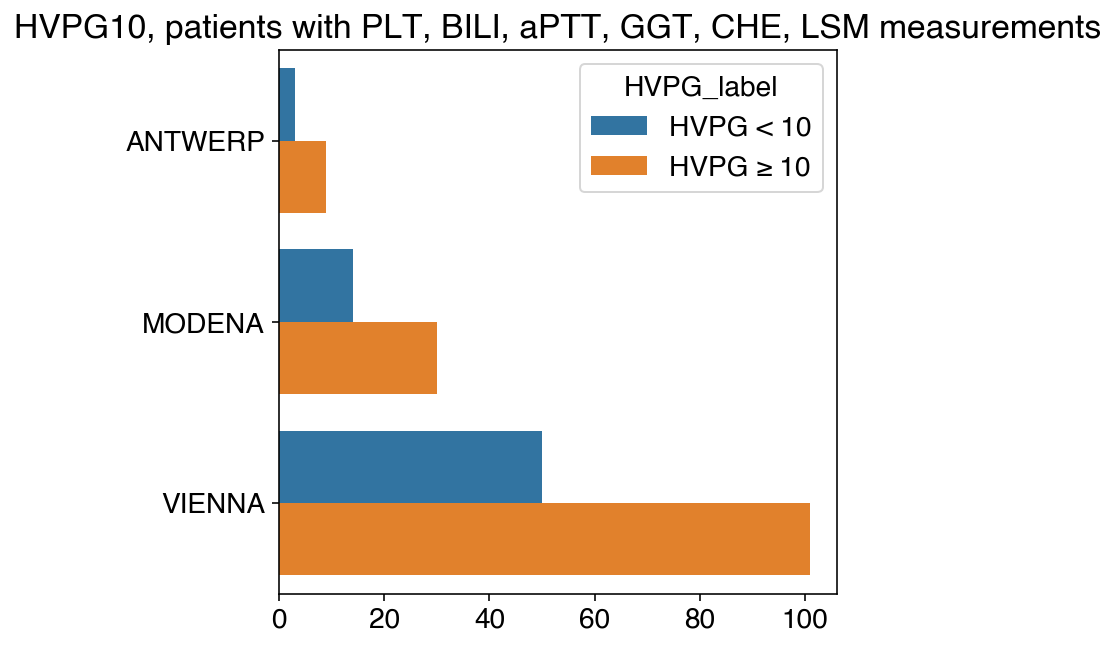

,VIENNA,ANTWERP,MODENA
Logistic Reg,0.880792,0.222222,0.792857
MLP,0.998020,0.388889,0.777381
Random Forest,1.000000,0.518519,0.813095
SVM,0.845743,0.407407,0.759524
XGBoost,1.000000,0.518519,0.785714


In [13]:
variables = ["PLT", "BILI", "aPTT", "GGT", "CHE", "LSM"]
HVPG16_functions.train_one_cohort_validate_rest(data_5P, models, names, variables, "VIENNA", HVPG_thres=10)

#### 3-parameter including liver stiffness

4 variables (PLT, BILI, INR, LSM), trained on: VIENNA, 796 patients, 531 HVPG<10, 265 HVPG>=10


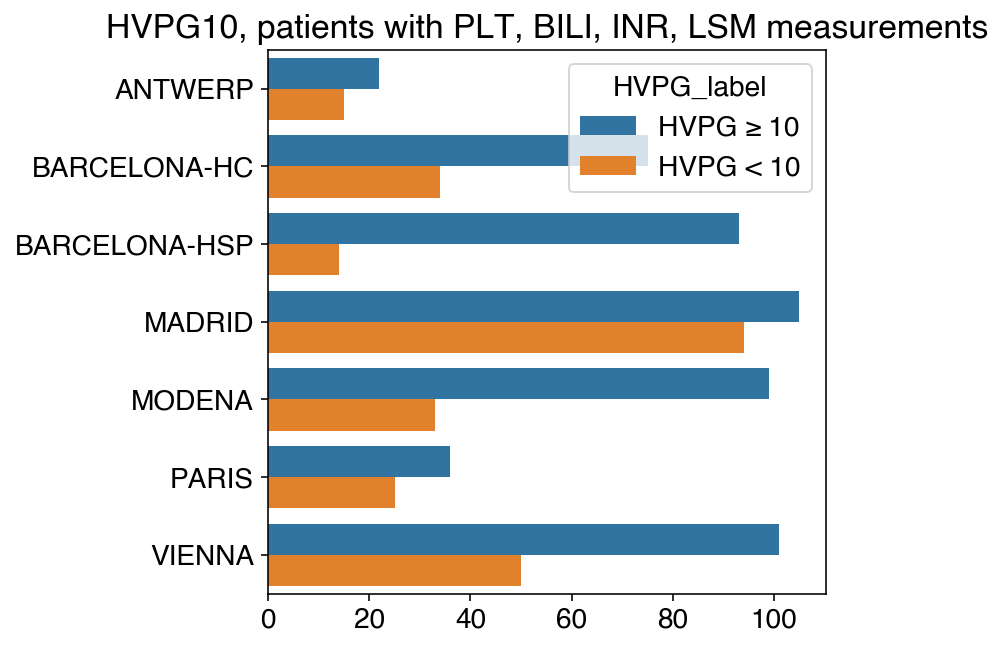

,VIENNA,ANTWERP,BARCELONA-HC,BARCELONA-HSP,MADRID,MODENA,PARIS
Logistic Reg,0.846535,0.648485,0.818824,0.885561,0.937082,0.820018,0.775556
MLP,0.825149,0.715152,0.816078,0.880952,0.925431,0.800122,0.747778
Random Forest,1.000000,0.675758,0.790000,0.929339,0.908612,0.754668,0.800556
SVM,0.819010,0.739394,0.749020,0.914747,0.887335,0.765228,0.781111
XGBoost,1.000000,0.689394,0.737255,0.834869,0.856332,0.732782,0.753889


In [14]:
variables = ["PLT", "BILI", "INR", "LSM"]
HVPG16_functions.train_one_cohort_validate_rest(data, models, names, variables, "VIENNA", HVPG_thres=10)